In [112]:
import numpy as np 
import matplotlib.pyplot as plt 

In [113]:
def f(x): 
    y = np.exp(-(32*x[:,0])**2/2) * np.exp(-(1/32*x[:,1])**2/2)
    return y 

In [114]:
def generate_data(N_train, N_test, d): 
    
    x_train = np.random.normal(0, 1, N_train*d).reshape((N_train, d))
    #print(x_train)
    y_train = f(x_train).reshape((N_train,1))
    #print(y_train)

    x_test = np.random.normal(0, 1, N_test*d).reshape((N_test, d))
    y_test = f(x_test).reshape((N_test,1))
    
    # normalize the data 
    
    mean_x = np.mean(x_train)
    std_x = np.std(x_train, ddof=1)
    mean_y = np.mean(y_train)
    std_y = np.std(y_train, ddof=1)
    
    x_train = (x_train - mean_x)/std_x
    y_train = (y_train - mean_y)/std_y
    #print(y_train)
    
    x_test = (x_test - mean_x)/std_x
    y_test = (y_test - mean_y)/std_y
    
    #x_test = (x_test - np.mean(x_test))/np.std(x_test, ddof=1)
    #y_test = (y_test - np.mean(y_test))/np.std(y_test, ddof=1)
    
    return x_train, y_train, x_test, y_test

In [115]:
one = np.ones(10)
np.shape(one)

(10,)

In [116]:
# minimization function 
def min_fun(x, y, w, lambda_): 
    N = np.shape(x)[0]
    K = np.shape(w)[0]
    I = np.identity(K)
    one = np.ones(N)
    x_ = np.c_[x, one]
    S = np.cos(x_.dot(w.T)) 
    beta = np.linalg.inv(np.dot(S.T, S) + lambda_ * N * I).dot(S.T).dot(y)
    return beta, S

In [117]:
def error_compute(y, S, beta):
    N = np.shape(y)[0]
    diff = S.dot(beta) - y
    error = (np.linalg.norm(diff, ord=2))**2 / N
    return error

In [118]:
# Metropolis algorithm 1

def algorithm_1(x_train, y_train, x_test, y_test, K, M, lambda_, delta, gamma):
    
    d = np.shape(x_train)[1] 
    
    w = np.zeros(K*(d+1)).reshape((K, d+1))
    
    error_list = np.zeros(M*2).reshape(M,2)
    
    beta, S = min_fun(x_train, y_train, w, lambda_)
    for i in range(M): 
        #print('w=', i)
        r_n = np.random.normal(0, 1, K*(d+1)).reshape((K, d+1))
        w_temp = w + delta * r_n
        beta_temp, S_temp = min_fun(x_train, y_train, w_temp, lambda_)
        for k in range(K): 
            #print('k=', k)
            r_u = np.random.uniform(0, 1)
            if (np.linalg.norm(beta_temp[k], ord=1)
                /np.linalg.norm(beta[k], ord=1))**gamma > r_u: 
                w[k] = w_temp[k]
                #print('w_k', w[k])
                beta[k] = beta_temp[k]
                #print('beta_k', beta[k])
        beta, S = min_fun(x_train, y_train, w, lambda_)
        
        f_est = S.dot(beta) 
        error_train = error_compute(y_train, S, beta)
        error_list[i,0] = error_train 
        
        beta_test, S_test = min_fun(x_test, y_test, w, lambda_)
        error_test = error_compute(y_test, S_test, beta)
        error_list[i,1] = error_test
        
    return beta, w, f_est, error_list 

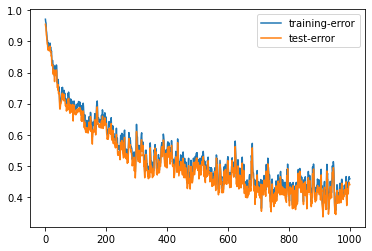

In [119]:
# generate data 
d = 2
N = 10**4

x_train, y_train, x_test, y_test = generate_data(N, N, d)

M = 10**3
K = 2**5
lambda_ = 0.1
delta = 0.5 
gamma = 3*d - 2

beta_1, w_1, f_est_1, error_1 = algorithm_1(x_train, y_train, 
                                            x_test, y_test, K, M, 
                                            lambda_, delta, gamma)

M_list = np.arange(1, M+1)
plt.plot(M_list, error_1[:,0], label = 'training-error')
plt.plot(M_list, error_1[:,1], label = 'test-error')
plt.legend()
plt.show()